In [2]:
import roadvision3d
import yaml
import os
import numpy as np
import torch

from roadvision3d.src.datasets.dair_kitti import DAIR_KITTI
from roadvision3d.src.engine.model_builder import build_model

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from roadvision3d.visualization import Visualizer



%load_ext autoreload
%autoreload 2


In [3]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_DAIR_KITTI_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
data = DAIR_KITTI(split='train', cfg=cfg['dataset'])


Resolution init: [1920 1088]


In [4]:
data_id = 0
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

In [5]:
def get_pitch(transformation_matrix):
    """
    Extracts the Euler angles from a 4x4 transformation matrix.
    
    Args:
    - transformation_matrix (numpy.array): 4x4 transformation matrix

    Returns:
    - roll, pitch, yaw (floats): Euler angles in radians
    """
    # Converting the list to a 3x4 numpy array first
    matrix_3x4 = np.array(transformation_matrix).reshape(3, 4)

    # Appending the row [0, 0, 0, 1] at the bottom to make it a 4x4 matrix
    transformation_matrix = np.vstack([matrix_3x4, [0, 0, 0, 1]])
    assert transformation_matrix.shape == (4, 4), "Matrix must be 4x4"
    
    # Extract 3x3 rotation matrix from the 4x4 transformation matrix
    R = transformation_matrix[:3, :3]
    
    # Pitch
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2)) + np.pi/2
    return pitch

camera_pitch = get_pitch(calib.V2C)


print('Pitch = ', camera_pitch)


Pitch =  0.22842024753681778


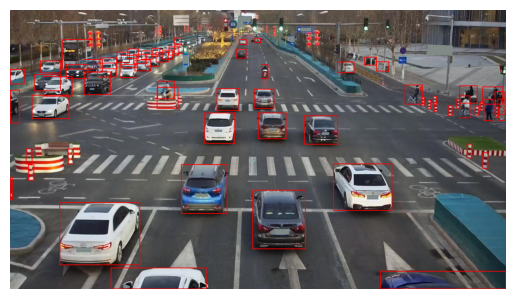

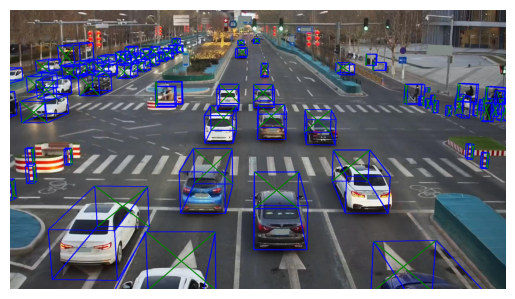

In [6]:
# Initialize the visualizer with calibration data and pitch
visualizer = Visualizer(calib=calib, pitch=camera_pitch)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img, labels, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img, labels, color='blue', color_front='green', width=4, display=True)

## Eval results

In [7]:
from roadvision3d.src.datasets.kitti import get_objects_from_label

Resolution init: [1920 1088]


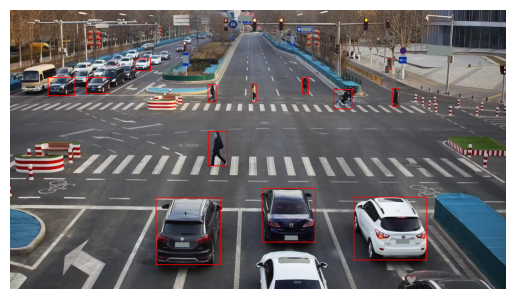

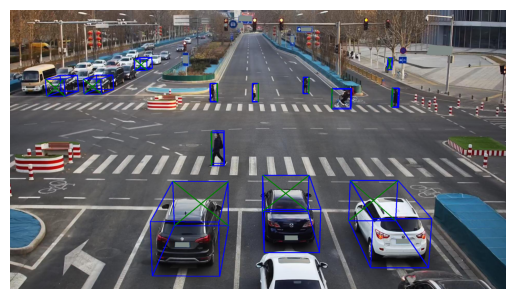

In [8]:
id_test = 564

labels_test_path = f'/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_DAIR_KITTI_150e/output/EPOCH_150/data/{id_test:06d}.txt'

labels_test = get_objects_from_label(labels_test_path)

data_test = DAIR_KITTI(split='val', cfg=cfg['dataset'])
img_test = data_test.get_image(id_test)
calib_test = data_test.get_calib(id_test)

# Initialize the visualizer with calibration data and pitch
eval_visualizer = Visualizer(calib=calib_test, pitch=camera_pitch)

# Draw 2D bounding boxes on the image
image_with_2d = eval_visualizer.draw_2d_bboxes(img_test, labels_test, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = eval_visualizer.draw_3d_bboxes(img_test, labels_test, color='blue', color_front='green', width=4, display=True)